In [29]:
%matplotlib notebook

In [30]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [31]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [32]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [33]:
loss_summary = [[], [], []]
acc_summary = [[], [], []]

In [34]:
n_classes = 10
nm_epochs = 80
batch_size = 100

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float', [None, 10])

In [35]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

In [36]:
def maxpool2d(x):
    #                        size of window         movement of window
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [37]:
def neural_network_model_0(x): #3241130
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,1,32], stddev=0.1)),
               'W_conv2':tf.Variable(tf.truncated_normal([5,5,32,56], stddev=0.1)),               
               'W_conv3':tf.Variable(tf.truncated_normal([5,5,56,60], stddev=0.1)),               
               'W_conv4':tf.Variable(tf.truncated_normal([5,5,60,60], stddev=0.1)),
               'W_fc':tf.Variable(tf.truncated_normal([7*7*60,1024], stddev=0.1)),
               'out':tf.Variable(tf.truncated_normal([1024, n_classes], stddev=0.1))}

    biases = {'b_conv1':tf.Variable(tf.constant(0.1, shape=[32])),
               'b_conv2':tf.Variable(tf.constant(0.1, shape=[56])),
               'b_conv3':tf.Variable(tf.constant(0.1, shape=[60])),
               'b_conv4':tf.Variable(tf.constant(0.1, shape=[60])),
               'b_fc':tf.Variable(tf.constant(0.1, shape=[1024])),
               'out':tf.Variable(tf.constant(0.1, shape=[n_classes]))}

    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1'])
    conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool2d(conv2)

    conv3 = tf.nn.relu(conv2d(conv2, weights['W_conv3']) + biases['b_conv3'])
    conv4 = tf.nn.relu(conv2d(conv3, weights['W_conv4']) + biases['b_conv4'])
    conv4 = maxpool2d(conv4)
    
    fc = tf.reshape(conv4,[-1, 7*7*60])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output

In [38]:
def neural_network_model_1(x): #3241354
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,1,32], stddev=0.1)),
               'W_conv2':tf.Variable(tf.truncated_normal([3,3,32,64], stddev=0.1)),
               'W_fc':tf.Variable(tf.truncated_normal([7*7*64,1024], stddev=0.1)),
               'out':tf.Variable(tf.truncated_normal([1024, n_classes], stddev=0.1))}

    biases = {'b_conv1':tf.Variable(tf.constant(0.1, shape=[32])),
               'b_conv2':tf.Variable(tf.constant(0.1, shape=[64])),
               'b_fc':tf.Variable(tf.constant(0.1, shape=[1024])),
               'out':tf.Variable(tf.constant(0.1, shape=[n_classes]))}

    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool2d(conv1)
    
    conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool2d(conv2)

    fc = tf.reshape(conv2,[-1, 7*7*64])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output

In [39]:
def neural_network_model_2(x): # 3241580
    weights = {'W_conv1':tf.Variable(tf.truncated_normal([3,3,1,16], stddev=0.1)),
               'W_fc':tf.Variable(tf.truncated_normal([14*14*16,1030], stddev=0.1)),
               'out':tf.Variable(tf.truncated_normal([1030, n_classes], stddev=0.1))}

    biases = {'b_conv1':tf.Variable(tf.constant(0.1, shape=[16])),
               'b_fc':tf.Variable(tf.constant(0.1, shape=[1030])),
               'out':tf.Variable(tf.constant(0.1, shape=[n_classes]))}

    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool2d(conv1)

    fc = tf.reshape(conv1,[-1, 14*14*16])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])

    output = tf.matmul(fc, weights['out'])+biases['out']

    return output

In [40]:
def train_neural_network(x):
    num_batches_per_epoch = mnist.train.num_examples // batch_size
    predictions = [neural_network_model_0(x), neural_network_model_1(x), neural_network_model_2(x)]
    for i, prediction in enumerate(predictions):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
        accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1)), tf.float32))
        optimizer = tf.train.AdamOptimizer().minimize(cost)

        config=tf.ConfigProto()
        config.gpu_options.allow_growth=True
        
        with tf.Session(config=config) as sess:
            sess.run(tf.global_variables_initializer())

            for epoch in range(nm_epochs):
                epoch_loss = 0.0
                epoch_acc = 0.0
                for _ in range(0, num_batches_per_epoch):
                    epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                    _, c, a = sess.run([optimizer, cost, accuracy], feed_dict={x: epoch_x, y: epoch_y})
                    epoch_loss += c / num_batches_per_epoch
                    epoch_acc += a / num_batches_per_epoch
                loss_summary[i].append(epoch_loss)
                acc_summary[i].append(epoch_acc)

                print('Epoch', epoch, 'completed out of',nm_epochs,'loss:',epoch_loss, 'accuracy:', epoch_acc)

In [41]:
train_neural_network(x)

Epoch 0 completed out of 80 loss: 0.7278590007236412 accuracy: 0.9179454602097892
Epoch 1 completed out of 80 loss: 0.05151850133033641 accuracy: 0.9835091011090672
Epoch 2 completed out of 80 loss: 0.03525742308543575 accuracy: 0.989109098911282
Epoch 3 completed out of 80 loss: 0.026847322609048027 accuracy: 0.9907454628294139
Epoch 4 completed out of 80 loss: 0.02223300610399085 accuracy: 0.9927636427229088
Epoch 5 completed out of 80 loss: 0.020518589664001906 accuracy: 0.9933818242766629
Epoch 6 completed out of 80 loss: 0.017333265278762566 accuracy: 0.9940000053969295
Epoch 7 completed out of 80 loss: 0.013253382206160262 accuracy: 0.9959454581954276
Epoch 8 completed out of 80 loss: 0.015440223664683632 accuracy: 0.9947636411406774
Epoch 9 completed out of 80 loss: 0.013893195132023244 accuracy: 0.9956181859970098
Epoch 10 completed out of 80 loss: 0.013593325637573959 accuracy: 0.9955818223953247
Epoch 11 completed out of 80 loss: 0.01249700795116785 accuracy: 0.99592727661132

Epoch 17 completed out of 80 loss: 0.00516764762739226 accuracy: 0.9984181832183512
Epoch 18 completed out of 80 loss: 0.004399312495670733 accuracy: 0.9986181831359903
Epoch 19 completed out of 80 loss: 0.0019091705818735504 accuracy: 0.9993454551696819
Epoch 20 completed out of 80 loss: 0.0031000197164069037 accuracy: 0.9991272735595744
Epoch 21 completed out of 80 loss: 0.0014823635721021087 accuracy: 0.9995090913772628
Epoch 22 completed out of 80 loss: 0.0035223697083393555 accuracy: 0.9990545463562048
Epoch 23 completed out of 80 loss: 0.00435163253695673 accuracy: 0.9987818193435708
Epoch 24 completed out of 80 loss: 0.002079989895150398 accuracy: 0.9995636367797903
Epoch 25 completed out of 80 loss: 0.0013718953438448139 accuracy: 0.9997454547882134
Epoch 26 completed out of 80 loss: 0.0005904181082322846 accuracy: 0.9998000001907399
Epoch 27 completed out of 80 loss: 0.006950440304447053 accuracy: 0.9979454565048249
Epoch 28 completed out of 80 loss: 0.0018084468620003405 accu

Epoch 33 completed out of 80 loss: 1.0694313803647703e-06 accuracy: 1.0000000000000056
Epoch 34 completed out of 80 loss: 8.18799494372126e-07 accuracy: 1.0000000000000056
Epoch 35 completed out of 80 loss: 6.190810800306557e-07 accuracy: 1.0000000000000056
Epoch 36 completed out of 80 loss: 4.6821769524963903e-07 accuracy: 1.0000000000000056
Epoch 37 completed out of 80 loss: 3.5330599694899916e-07 accuracy: 1.0000000000000056
Epoch 38 completed out of 80 loss: 2.6922396537333184e-07 accuracy: 1.0000000000000056
Epoch 39 completed out of 80 loss: 2.0577959714077317e-07 accuracy: 1.0000000000000056
Epoch 40 completed out of 80 loss: 1.5431236987369233e-07 accuracy: 1.0000000000000056
Epoch 41 completed out of 80 loss: 1.175138633537708e-07 accuracy: 1.0000000000000056
Epoch 42 completed out of 80 loss: 8.805206459314911e-08 accuracy: 1.0000000000000056
Epoch 43 completed out of 80 loss: 6.768904771399658e-08 accuracy: 1.0000000000000056
Epoch 44 completed out of 80 loss: 5.142896690856

<IPython.core.display.Javascript object>


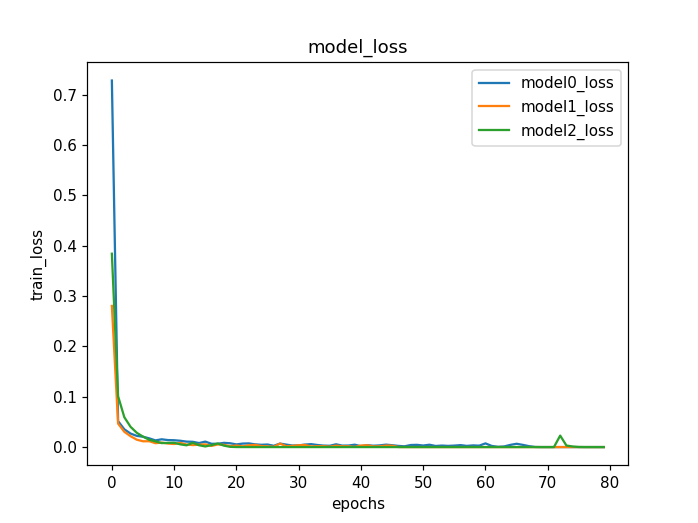

In [42]:
#plt.figure(figsize=(15, 8))
plt.figure()
for i in range(3):
    plt.plot(np.arange(0, nm_epochs), loss_summary[i], label="model"+str(i)+"_loss")
plt.xlabel('epochs')
plt.ylabel('train_loss')
plt.title('model_loss')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


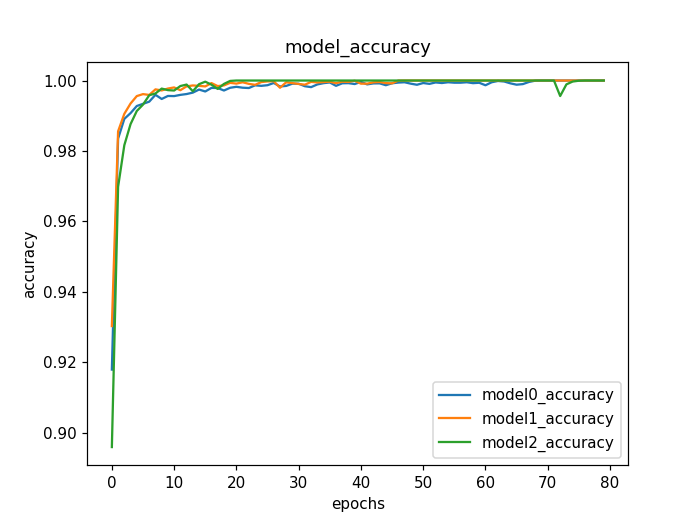

In [43]:
#plt.figure(figsize=(15, 8))
plt.figure()
for i in range(3):
    plt.plot(np.arange(0, nm_epochs), acc_summary[i], label="model"+str(i)+"_accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model_accuracy')
plt.legend(loc='best')
plt.show()